In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston

In [3]:
# Load the dataset
boston = load_boston()

In [4]:
# Convert the dataset to a Pandas dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target

In [5]:
# Check for null values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


In [6]:
# Drop unnecessary columns
df.drop(['ZN', 'NOX', 'INDUS'], axis=1, inplace=True)

In [7]:
# Perform one-hot encoding on the 'CHAS' feature
df = pd.get_dummies(df, columns=['CHAS'])

In [8]:
# Fill null values with the median
df.fillna(df.median(), inplace=True)

<AxesSubplot:>

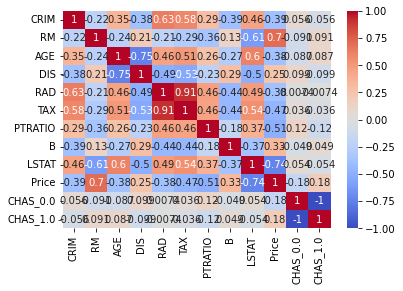

In [12]:
# Visualize the correlation between features
# Calculate the correlation matrix
df=df.corr()
sns.heatmap(df, annot=True, cmap='coolwarm')


In [13]:
# Extract the input features and target variable
X = df.drop(['Price'], axis=1)
y = df['Price']

In [14]:
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Add polynomial features to the input features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [17]:
# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict on the test set
y_pred = reg.predict(X_test)

In [19]:
# Evaluate the performance of the model using MSE, RMSE, and R^2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [20]:
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

MSE: 0.08778500733566509
RMSE: 0.296285347824804
R^2: 0.7644419366017499


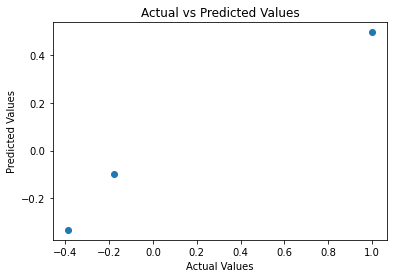

In [21]:
# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()